**Kết nối Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Thêm thư viện**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation, Dropout,Conv2D, MaxPooling2D, Flatten, MaxPool2D, BatchNormalization,SeparableConv2D
from keras.models import  Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.models import load_model
import os 
import seaborn as sns

**Lấy đường dẫn tập train, validation, test trong datasets**

In [7]:
path_train='/content/drive/MyDrive/Colab Notebooks/Datasets/train'
path_validation='/content/drive/MyDrive/Colab Notebooks/Datasets/validation'
path_test='/content/drive/MyDrive/Colab Notebooks/Datasets/test'

**In ra đồ thị số lượng hình ảnh trong mỗi tập**

Text(0.5, 1.0, 'TEST')

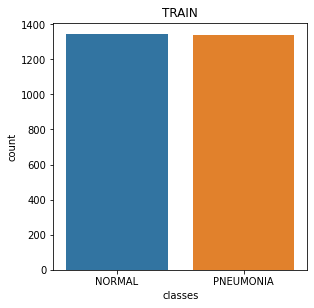

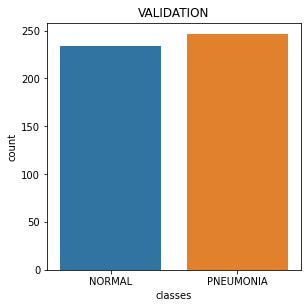

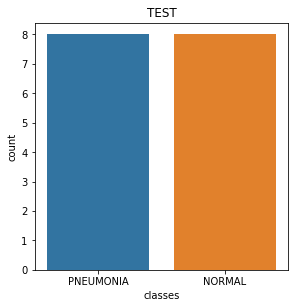

In [4]:
# Tạo dataframe
train_dataframe = validation_dataframe = test_dataframe = pd.DataFrame(columns=['classes','count'])

# In ra đồ thị số lượng hình ảnh trong tập train
train_dataframe['classes']=pd.Series([os.listdir(path_train)[x] for x in range(0,2)])
train_dataframe['count']=pd.Series([len(os.listdir(os.path.join(path_train,os.listdir(path_train)[x]))) for x in range(0,2)])
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
g=sns.barplot(x='classes', y='count',data=train_dataframe)
g.set_xticklabels(g.get_xticklabels())
plt.title("TRAIN")

# In ra đồ thị số lượng hình ảnh trong tập validation
validation_dataframe['classes']=pd.Series([os.listdir(path_validation)[x] for x in range(0,2)])
validation_dataframe['count']=pd.Series([len(os.listdir(os.path.join(path_validation,os.listdir(path_validation)[x]))) for x in range(0,2)])
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 2)
g=sns.barplot(x='classes', y='count',data=validation_dataframe)
g.set_xticklabels(g.get_xticklabels())
plt.title("VALIDATION")

## In ra đồ thị số lượng hình ảnh trong tập test
test_dataframe['classes']=pd.Series([os.listdir(path_test)[x] for x in range(0,2)])
test_dataframe['count']=pd.Series([len(os.listdir(os.path.join(path_test,os.listdir(path_test)[x]))) for x in range(0,2)])
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 3)
g=sns.barplot(x='classes', y='count',data=test_dataframe)
g.set_xticklabels(g.get_xticklabels())
plt.title("TEST")

**Thay đổi kích thước hình ảnh và lấy ảnh ảnh gán vào các tập dữ liệu**

In [5]:
train_dataset = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_dataset = ImageDataGenerator(rescale=1./255)
test_dataset = ImageDataGenerator(rescale=1./255)

In [6]:
training_generator = train_dataset.flow_from_directory(
                      path_train,
                        target_size=(128, 128),
                        batch_size=50,
                        class_mode="categorical")
validation_generator = validation_dataset.flow_from_directory(
                        path_validation,
                         target_size=(128, 128),
                          batch_size=50,
                         class_mode="categorical")

test_generator = test_dataset.flow_from_directory(
                        path_test,
                         target_size=(128, 128),
                          batch_size=30,
                         class_mode="categorical")

Found 2679 images belonging to 2 classes.
Found 480 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


**In ra các class trong tập train**

In [7]:
training_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

**Tạo mô hình CNN**

In [8]:
##CNN
model=Sequential()
model.add(Conv2D(32 , (3,3), activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(128,128,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), padding = 'same'))

model.add(Conv2D(64 , (3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64 , (3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPool2D((2,2), padding = 'same'))

model.add(Conv2D(128 , (3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128 , (3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPool2D((2,2), padding = 'same'))

model.add(Conv2D(256 , (3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(256 , (3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPool2D((2,2), padding = 'same'))

model.add(Conv2D(512 , (3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(512 , (3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), padding = 'same'))

#ANN
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(units = 2 , activation = 'sigmoid'))

In [9]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)
from keras.backend import categorical_crossentropy
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        3

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 5,763,362
Trainable params: 5,762,274
Non-trainable params: 1,088
_________________________________________________________________


**Xem thành phần cấu trúc của mô hình CNN**

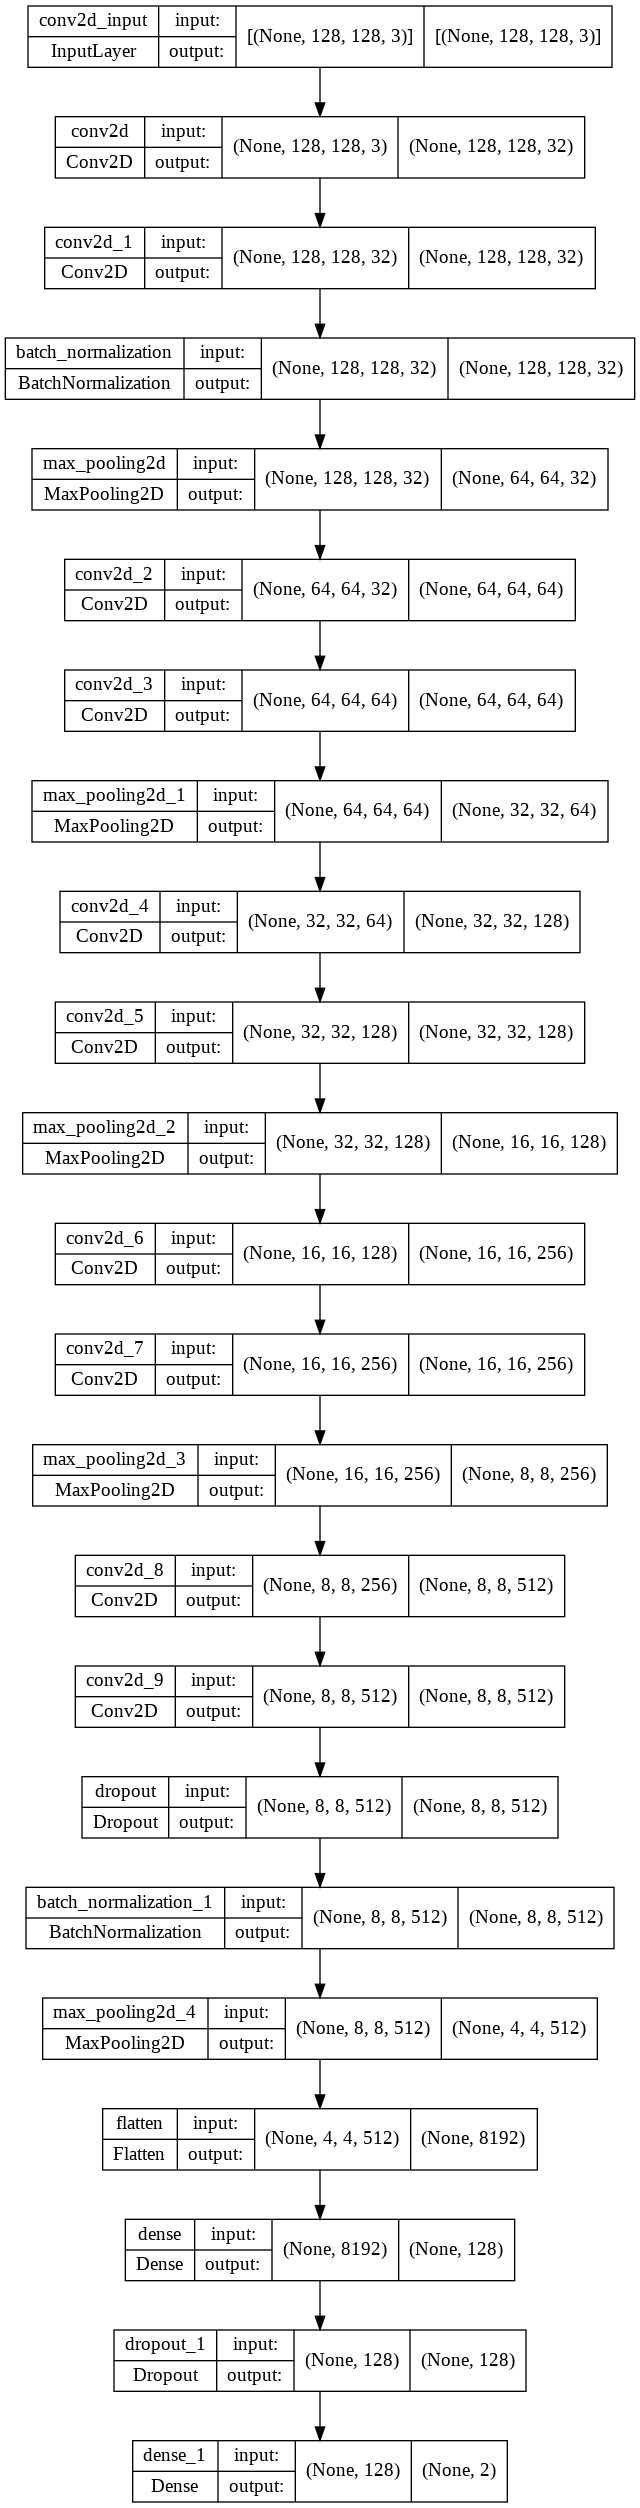

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes = True)

**Bắt đầu huấn luyện**

In [11]:
history = model.fit(training_generator, batch_size=30, epochs=50, verbose=1,validation_data=validation_generator)

Epoch 1/50
54/54 [==============================] - 190s 3s/step - loss: 0.8761 - accuracy: 0.6719 - val_loss: 9.7452 - val_accuracy: 0.4875
Epoch 2/50
54/54 [==============================] - 54s 1s/step - loss: 0.5841 - accuracy: 0.7107 - val_loss: 0.6175 - val_accuracy: 0.6667
Epoch 3/50
54/54 [==============================] - 54s 996ms/step - loss: 0.4757 - accuracy: 0.7503 - val_loss: 0.6480 - val_accuracy: 0.6854
Epoch 4/50
54/54 [==============================] - 54s 1000ms/step - loss: 0.4645 - accuracy: 0.7704 - val_loss: 0.7129 - val_accuracy: 0.6646
Epoch 5/50
54/54 [==============================] - 53s 987ms/step - loss: 0.4245 - accuracy: 0.8033 - val_loss: 0.8862 - val_accuracy: 0.5604
Epoch 6/50
54/54 [==============================] - 53s 983ms/step - loss: 0.3911 - accuracy: 0.8093 - val_loss: 5.5401 - val_accuracy: 0.5167
Epoch 7/50
54/54 [==============================] - 55s 1s/step - loss: 0.3613 - accuracy: 0.8186 - val_loss: 7.6785 - val_accuracy: 0.5125
Epoch 

**Lưu model đã huấn luyện**

In [12]:
model.save('/content/drive/MyDrive/Colab Notebooks/ProjectAI.h5')

**Tải model lên để dùng**

In [4]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/ProjectAI.h5')

**Xem đồ thị độ chính xác của mô hình**

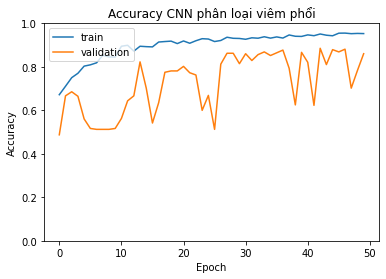

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy CNN phân loại viêm phổi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper left')
plt.ylim(0,1)
plt.show()

In [15]:
# Using the validation dataset
score = model.evaluate(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

10/10 [==============================] - 5s 509ms/step - loss: 0.3891 - accuracy: 0.8604
Val loss: 0.3891134262084961
Val accuracy: 0.8604166507720947


In [16]:
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 1s 847ms/step - loss: 0.3036 - accuracy: 0.8750
Test loss: 0.30362704396247864
Test accuracy: 0.875


In [17]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
              precision    recall  f1-score   support

      NORMAL       0.40      0.50      0.44         8
   PNEUMONIA       0.33      0.25      0.29         8

    accuracy                           0.38        16
   macro avg       0.37      0.38      0.37        16
weighted avg       0.37      0.38      0.37        16



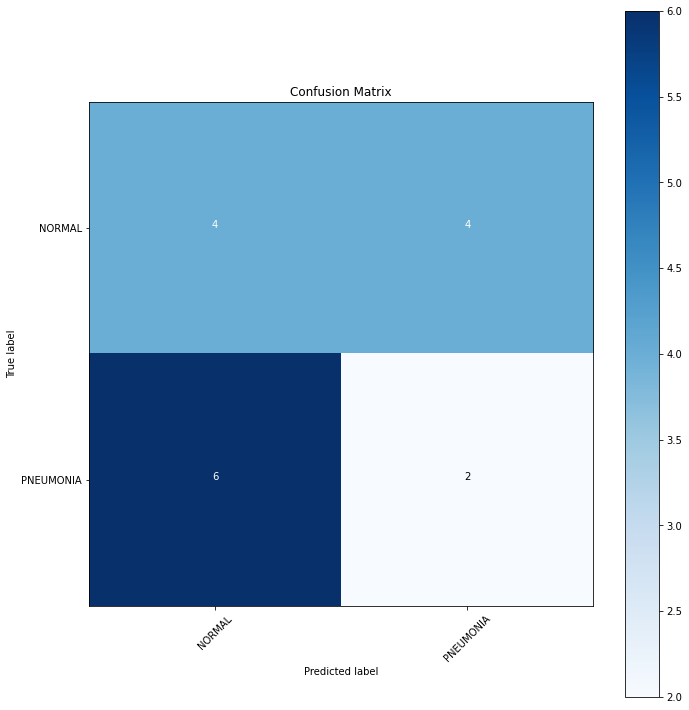

In [18]:
classes = list(training_generator.class_indices.keys())
# training_generator.class_indices
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes
# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
# Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

**Đưa tập test vào dự đoán**

In [19]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

Result: Normal


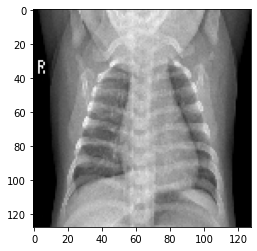

In [20]:
url='/content/drive/MyDrive/Colab Notebooks/Datasets/train/NORMAL/IM-0199-0001.jpeg'
pic = image.load_img(url, target_size=(128,128)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,128,128,3) 
pic = pic.astype('float32')
pic = pic/255
# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Result: Normal")
if guess[0]==1:
  print("Result: Pneumonia")

Result: Pneumonia


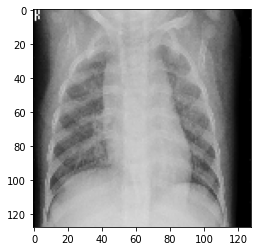

In [22]:
url='/content/drive/MyDrive/Colab Notebooks/Datasets/test/PNEUMONIA/person1947_bacteria_4876.jpeg'
pic = image.load_img(url, target_size=(128,128)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,128,128,3) 
pic = pic.astype('float32')
pic = pic/255
# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Result: Normal")
if guess[0]==1:
  print("Result: Pneumonia")